In [1]:
import pandas as pd
import statsmodels.api as sm
x=pd.read_csv("C:/Users/charumathi/Downloads/HeartDisease.csv")
df=pd.DataFrame(x)
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

(array([143.,   0.,   0.,  50.,   0.,   0.,  87.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

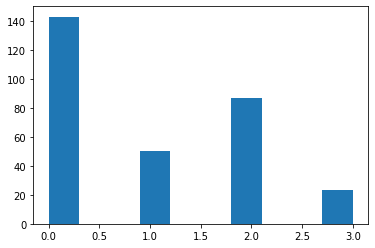

In [130]:
import matplotlib.pyplot as plt
plt.hist(df["chest_pain"])

<BarContainer object of 303 artists>

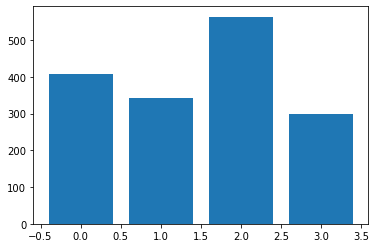

In [131]:
plt.bar(x=df["chest_pain"],height=df["cholestrol"])

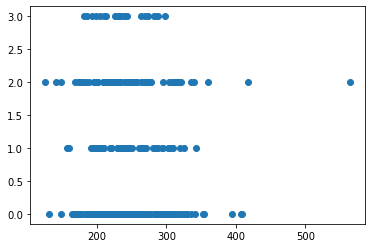

In [132]:
plt.scatter(df["cholestrol"],df["chest_pain"])

<AxesSubplot:xlabel='rest_bps', ylabel='cholestrol'>

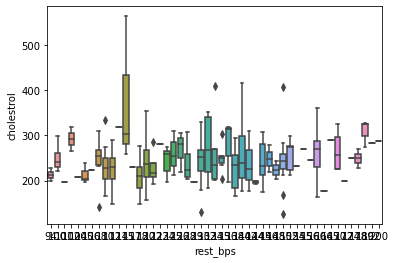

In [133]:
import seaborn as sns
sns.boxplot(x=df["rest_bps"],y=df["cholestrol"])

In [134]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [135]:
x=df.drop(["target","fasting_blood_sugar"],axis=1)
y=df.iloc[:,13]

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 12), (61, 12), (242,), (61,))

In [137]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [138]:
y_pred=model.predict(x_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]


### ACCURACY 

In [139]:
#TO FIND PERFORMANCE:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8032786885245902


In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [141]:
#LIBRARIES
from sklearn import decomposition,datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

In [142]:
sc=StandardScaler()

In [143]:
pca=decomposition.PCA()

In [144]:
decisiontree=tree.DecisionTreeClassifier()
pipe=Pipeline(steps=[('sc',sc),('pca',pca),('decisiontree',decisiontree)])

In [145]:
n_components=list(range(1,x.shape[1]+1,1))

In [146]:
criterion=['gini','entropy']
max_depth=[4,6,8,12]

In [147]:
parameters=dict(pca__n_components=n_components,decisiontree__criterion=criterion,decisiontree__max_depth=max_depth)

In [148]:
clf=GridSearchCV(pipe,parameters)
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('decisiontree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [4, 6, 8, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [149]:
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])

Best Criterion: entropy


In [150]:
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])

Best max_depth: 4


In [151]:
print('Best Number Of Components:',clf.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 3


In [152]:
print(clf.best_estimator_.get_params()['decisiontree'])   

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [153]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, x, y, cv=4, n_jobs=-1)

In [154]:
print(CV_Result)

[0.81578947 0.84210526 0.69736842 0.70666667]


In [155]:
print(CV_Result.mean())

0.7654824561403508


In [156]:
print(CV_Result.std())

0.06422746576961792


### BAGGING TECHNIQUE

In [157]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree=BaggingClassifier(DecisionTreeClassifier(random_state=10))
tree.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

In [158]:
y_pred=ensem.predict(x_test)

In [159]:
from sklearn import metrics
bagging_score=metrics.roc_auc_score(y_pred,y_test)
print(bagging_score)

0.8564189189189189


### BOOSTING TECHNIQUE[ADABOOST]

In [160]:
from sklearn.ensemble import AdaBoostClassifier
# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(x_train, y_train)




AdaBoostClassifier(random_state=10)

In [161]:
# predict the values
y_pred_adaboost  = adaboost.predict(x_test)

In [162]:
adaboost_score = metrics.roc_auc_score(y_test, y_pred_adaboost)

In [164]:
df = pd.DataFrame()
df['Model'] = ['accuracy','Bagging','AdaBoost']
df['AUC roc curve'] = [accuracy,bagging_score,adaboost_score]
df

,Model,AUC roc curve
0,accuracy,0.803279
1,Bagging,0.856419
2,AdaBoost,0.904139


<BarContainer object of 3 artists>

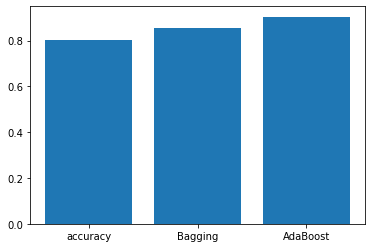

In [165]:
import matplotlib.pyplot as plt
plt.bar(x=df["Model"],height=df["AUC roc curve"])